# **Tarea Nº 4**
Scope: APIs

Curso:          Fundamentos de Programación en Python para Macroeconomía y Finanzas     
Profesor:       Victor Fuentes Campos     

- Fecha y hora de entrega: Viernes 12 de enero, 11:59pm
- Agregue los nombres de las personas con las que discutió esta tarea: ____ Armando Paredes ______
- Envíe su tarea haciendo el `push` de su código a su repo en GitHub Classroom: 

The Central Bank Reserve of Perú (BCRP) holds a list of datasets that are among the most comprehensive for macroeconomic purposes. In this exercise, we'll retrieve data from the [BCRP API](https://estadisticas.bcrp.gob.pe/estadisticas/series/ayuda/api) and explore the impact of pandemics

## Before starting

- You must pull the necessary data using `get` and `requests`
- You are required to apply the concepts learned in the previous sessions (`pandas`, `if`, `loop`, `function`)
- Hint: here is the BCRP url structure for the APIs call:
```html
https://estadisticas.bcrp.gob.pe/estadisticas/series/api/[códigos de series]/[formato de salida]/[periodo inicial]/[periodo final]/[idioma]
```

## The very long run

1. Locate the "Estadísticas de 100 años del BCRP" section in the BCRP´s series data statistics [here](https://estadisticas.bcrp.gob.pe/estadisticas/series/index) and identify the necessary code for the serie **`PBI (Mill S/ 2007)`**. Later, add manually the annual GDP values for 2022 and 2023 (be careful with the units of data). Then, **calculate** the Peruvian annual GDP growth (%) since 1922 to 2023. Finally, plot it using a very simple graph through `matplotlib` and provide critical insights (no more than 100 words)

    Hint1: use `.json()` for exploring the `content`. Your data is inside `["periods"]`
    
    Hint2: the graph must looks something like this: <img src="growth_gdp_long_run.png" max-width="300">
    

In [1]:
# Solution

In [2]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
url_base = 'https://estadisticas.bcrp.gob.pe/estadisticas/series/api/'
cod_ser = 'PD39563DA'
formato = '/json'
per = '/1922/2021'

url = f'{url_base}{cod_ser}{formato}{per}'

In [4]:
response = requests.get(url)

In [5]:
response_json = response.json()

In [6]:
response_json.keys()

dict_keys(['config', 'periods'])

In [7]:
nombre_serie = response_json['config']['series'][0]['name']
nombre_serie

'PBI Sectorial - PBI (Mill S/ 2007)'

In [8]:
data_raw = response_json['periods']

fecha_list = []
pbi_list = []

for element in data_raw:
    fecha_list.append(element['name'])
    pbi_list.append(element['values'][0])

In [15]:
pbi_dict = {'fechas': fecha_list, 'pbi': pbi_list}
pbi_df = pd.DataFrame(pbi_dict)
pbi_df['pbi'] = pbi_df['pbi'].astype(float)

In [16]:
pbi_df

,fechas,pbi
0,1922,14122.032222
1,1923,14756.217373
2,1924,16069.798806
3,1925,16575.199473
4,1926,18130.193094
...,...,...
95,2017,514215.000000
96,2018,534665.000000
97,2019,546605.000000
98,2020,486402.086278


In [27]:
pbi_2022 = 1.027*pbi_df['pbi'].iloc[99]
pbi_2023 = 0.995*pbi_2022

In [46]:
pbi_procesado = pd.concat( [ pbi_df , pd.DataFrame({'fechas':["2022", "2023"], 'pbi':[pbi_2022, pbi_2023]}) ], ignore_index=True ) 

In [47]:
pbi_procesado['pbi'] = pbi_procesado['pbi']

In [48]:
pbi_procesado['var_pbi'] = pbi_procesado['pbi'].pct_change() 

In [49]:
pbi_procesado['fechas'] = pbi_procesado['fechas'].astype(int)

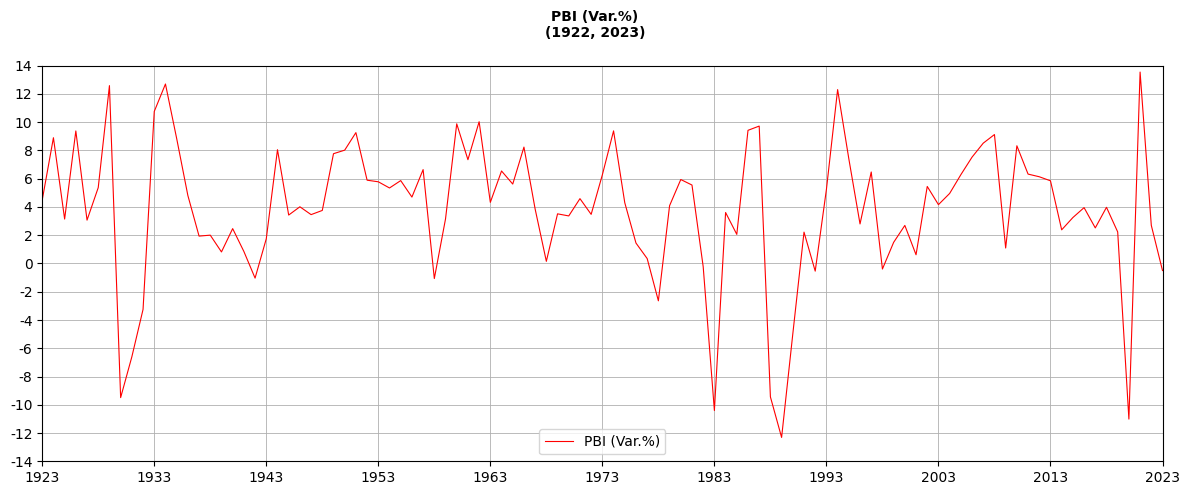

In [82]:
fig, axs = plt.subplots(1,1, figsize=(12, 5), tight_layout=True)

fig.suptitle('PBI (Var.%)\n(1922, 2023)', weight='bold', fontsize='medium')


axs.plot(pbi_procesado['fechas'], pbi_procesado['var_pbi'], color='red', linewidth=0.8, label='PBI (Var.%)')


axs.yaxis.set_major_formatter(lambda x, pos: f'{round(x*100)}')
axs.set_xticks(range(1923, 2024, 10))
axs.set_yticks(list(np.arange(-0.14, 0.15, 0.02)))
axs.set_ylim(-0.14, 0.14)
axs.grid(True, linewidth=0.6)
axs.set_xlim(1923, 2023)
axs.legend(loc='lower center')

plt.show()

## The hitman

2. Retrieve the up-to-date data for the monthly GDP in index (2007=100) from this [link](https://estadisticas.bcrp.gob.pe/estadisticas/series/mensuales/producto-bruto-interno-y-demanda-interna-variaciones-indice-2007). Then, calculate the the 5-year average monthly growth previous to the pandemics (ending in Feb-2020) for the 12-month rolling mean of the index, and project the alternative scenario of the Peruvian economy without the COVID-19. Then plot them out and provide insight from the gap between the real data and the pre-pandemic trend.

    Hint1: You may use the regression type of your election, but the OLS is recommended. 
    
    Hint2: Your plot should look somethig like this. You aren´t required to add flags/annotations/texts inside the graph <img src="growth_gdp_pandemics.png" max-width="300">

    Hint3: For more details about calculation, review this post from [The Economist](https://www.economist.com/graphic-detail/2021/10/28/americas-post-covid-economic-recovery-suffers-a-setback)
    


In [ ]:
# Solution

## The winners

- Based on the [Nasdaq Stock Screener](https://www.nasdaq.com/market-activity/stocks/screener), identify the three largest companies in the three larger sectors defined by market cap
- Elaborate a list/dictionary/series (what ever you think is more suitable) containing all tickers (or symbols) and sectors from these companies.
- So far, you can download data from Nasdaq, web scrape it or copy it manually. It doesn´t matter
- Then, use `yfinance` library to retrieve the market data for all the 9 firms
- Construct a table with the most common *institucional holders* by sector. Is there any interesting pattern? Hint: loop the `institutional_holders` from `yfinance`
- Calculate the distribution of the daily percentage returns for the 3 larger companies (defined by market cap) along the last 5 years. Plot your results (feel free to find the most appealing way to represent them) and provide critical insights

$$
  percentage\_return_{t} = \frac{price_t-price_{t-1}}{price_t}*100+dividends (\%)
$$

- Hint1: you can find the `dividens` through the `yfinance`'s 
`Ticker()`
- Hint2: some firms may not be paying dividends

In [ ]:
# Solution